# iris

本节介绍如何使用 iris 加载 GRIB2 要素场，并使用 cedarkit-maps 绘图。

## 安装 

使用 conda 安装 iris 和 iris-grib

```bash
conda install -c conda-forge iris iris-grib
```

## 准备

导入需要的包

In [1]:
import xarray as xr
import pandas as pd
import iris

设置绘图的数据参数，使用 CMA-MESO 2024 年 11 月 14 日 00 时次 024 时效数据。

In [12]:
system_name = "CMA-GFS"
data_type = "cma_gfs_gmf/grib2/orig"
start_time = pd.to_datetime("2024-11-14 00:00:00")
forecast_time = pd.to_timedelta("24h")

## 加载数据

设置 GRIB2 数据文件路径

In [13]:
file_path = '/g3/COMMONDATA/OPER/CEMC/GFS_GMF/Prod-grib/2024111400/ORIG/gmf.gra.2024111400024.grb2'
file_path

'/g3/COMMONDATA/OPER/CEMC/GFS_GMF/Prod-grib/2024111400/ORIG/gmf.gra.2024111400024.grb2'

> 注：可以使用 reki 库查找本地文件路径

In [14]:
from reki.data_finder import find_local_file

file_path_use_reki = find_local_file(
    data_type,
    start_time=start_time,
    forecast_time=forecast_time,
)
file_path_use_reki

PosixPath('/g3/COMMONDATA/OPER/CEMC/GFS_GMF/Prod-grib/2024111400/ORIG/gmf.gra.2024111400024.grb2')

使用 iris 加载温度要素场

In [20]:
# cubes = iris.load(file_path, "air_temperature")
cubes = iris.load(file_path)
print(cubes)

KeyError: 'numberOfTimeRange not defined in section 4'

选择 2 米温度要素场

In [21]:
t_2m_cube = cubes[1]
t_2m_cube

<iris 'Cube' of air_temperature / (K) (latitude: 1671; longitude: 2501)>

将 `iris.cube.Cube` 转为 `xarray.DataArray`

In [17]:
t_2m_field = xr.DataArray.from_iris(t_2m_cube) - 273.15
t_2m_field

<xarray.DataArray 'air_temperature' (latitude: 1671, longitude: 2501)> Size: 33MB
dask.array<sub, shape=(1671, 2501), dtype=float64, chunksize=(1671, 2501), chunktype=numpy.ndarray>
Coordinates:
  * latitude                 (latitude) float64 13kB 60.1 60.07 ... 10.03 10.0
  * longitude                (longitude) float64 20kB 70.0 70.03 ... 145.0 145.0
    forecast_period          timedelta64[ns] 8B ...
    forecast_reference_time  datetime64[ns] 8B ...
    height                   float64 8B ...
    time                     datetime64[ns] 8B ...

## 绘图

使用 cedarkit-maps 绘制 2 米温度填充图

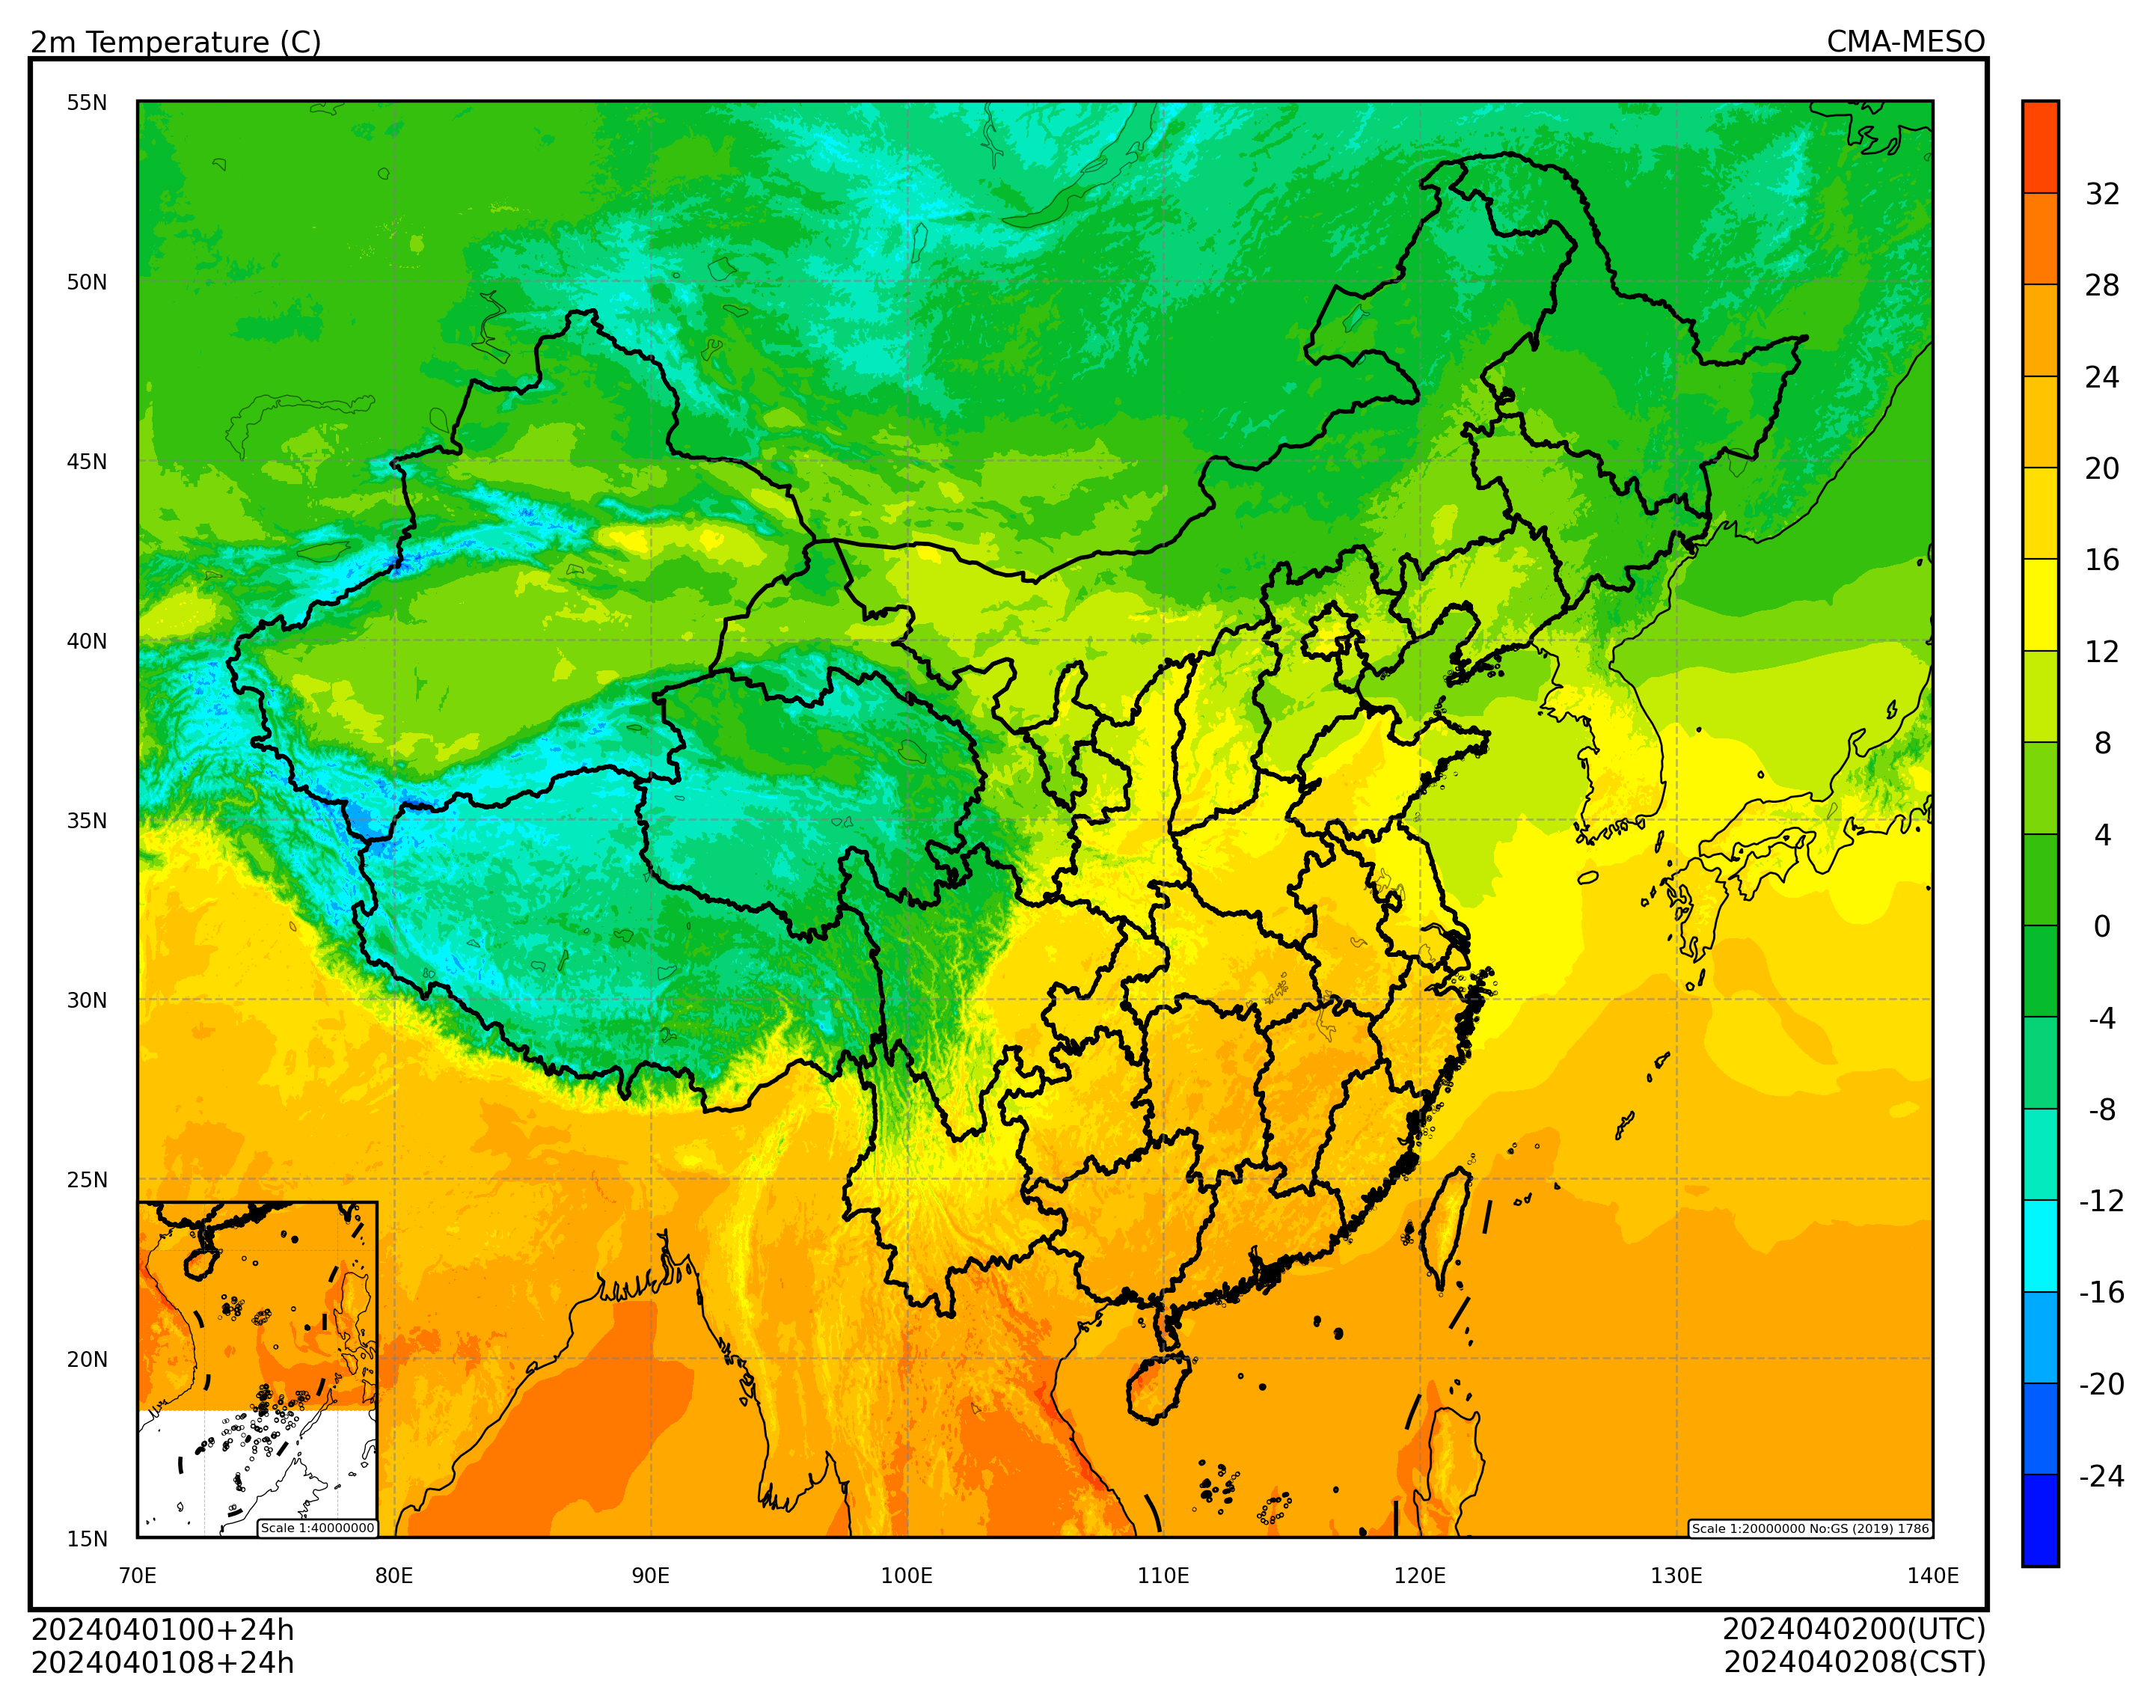

In [18]:
from cedarkit.maps.style import ContourStyle
from cedarkit.maps.chart import Panel
from cedarkit.maps.domains import EastAsiaMapTemplate
from cedarkit.maps.colormap import get_ncl_colormap

t_2m_level = [-24, -20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20, 24, 28, 32]
color_index = [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 152]
t_2m_color_map = get_ncl_colormap("BlAqGrYeOrReVi200", index=color_index)
t_2m_style = ContourStyle(
    colors=t_2m_color_map,
    levels=t_2m_level,
    fill=True,
)
domain = EastAsiaMapTemplate()
panel = Panel(domain=domain)
panel.plot(t_2m_field, style=t_2m_style)
domain.set_title(
    panel=panel,
    graph_name="2m Temperature (C)",
    system_name=system_name,
    start_time=start_time,
    forecast_time=forecast_time,
)
domain.add_colorbar(panel=panel, style=t_2m_style)
panel.show()